In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
file_path = 'EastWestAirlines.xlsx'  # Update with your file path
data = pd.read_excel(file_path, sheet_name='data')

In [5]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
# Drop the 'ID#' column as it's not useful for clustering
data = data.drop(columns=['ID#'])

In [9]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [11]:
# Convert scaled data to DataFrame for easy handling
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# K-Means Clustering with Elbow Method

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

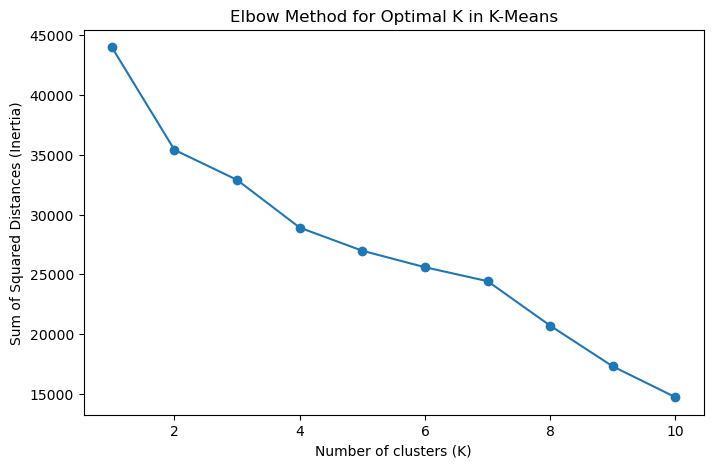

In [15]:
# Determine the optimal number of clusters using the Elbow method
sse = []  # Sum of squared errors for each k
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal K in K-Means')
plt.show()


# Hierarchical Clustering with Dendrogram

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

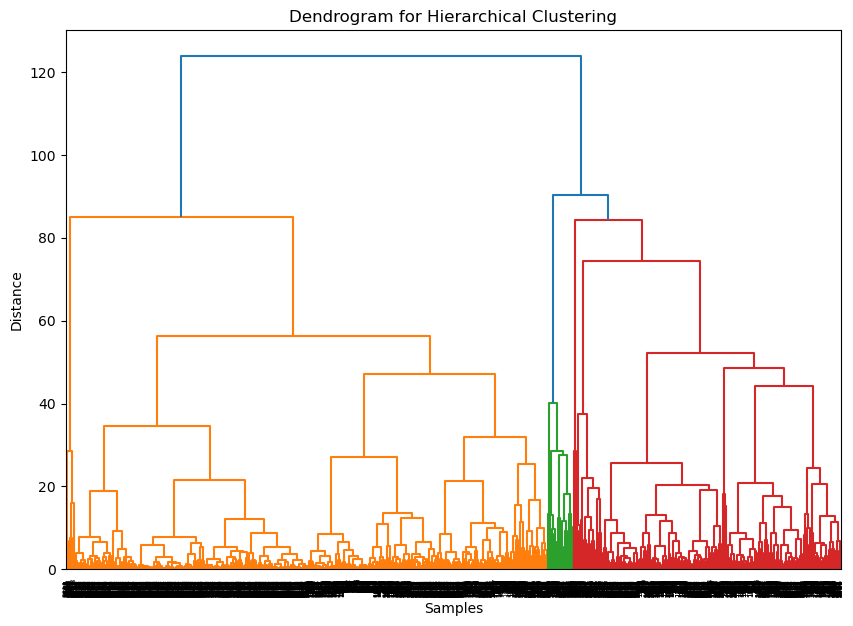

In [19]:
# Perform hierarchical clustering
linked = linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# DBSCAN Clustering

In [20]:
from sklearn.cluster import DBSCAN

In [23]:
# Set parameters for DBSCAN
epsilon = 0.5  # Radius for neighborhood
min_samples = 5  # Minimum number of points per cluster

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Append DBSCAN labels to the original data for analysis
scaled_df['DBSCAN_Cluster'] = dbscan_labels

In [31]:
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN_Cluster,KMeans_Cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,3
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,3
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,3
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,3
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1,2
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1,2
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-1,3
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0,3


# Cluster Analysis and Visualization

In [29]:
import seaborn as sns
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [35]:
kmeans_yp = kmeans.predict(scaled_df)

In [37]:
kmeans_yp

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
scaled_df["KM_cluster"] = kmeans_yp

In [41]:
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,DBSCAN_Cluster,KMeans_Cluster,KM_cluster
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0,3,1
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0,3,1
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0,3,1
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0,3,1
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1,2,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1,2,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-1,3,1
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0,3,1


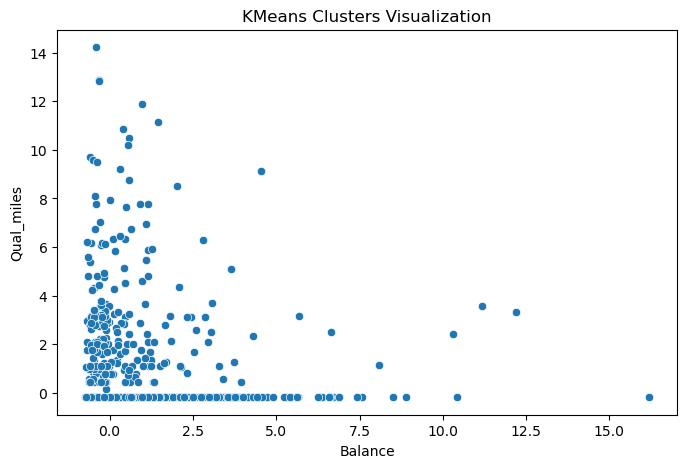

In [51]:
# Scatter plot of clusters (using first two features for simplicity)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_df.iloc[:, 0], y=scaled_df.iloc[:, 1])
plt.title('KMeans Clusters Visualization')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.show()

In [53]:
# Evaluate Clustering Quality with Silhouette Score

In [55]:
from sklearn.metrics import silhouette_score

# Evaluate KMeans clustering
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
print("Silhouette Score for KMeans:", kmeans_silhouette)

# Evaluate DBSCAN clustering
# Exclude noise points (-1 label) from silhouette calculation for DBSCAN
dbscan_filtered = scaled_df[scaled_df['DBSCAN_Cluster'] != -1]
dbscan_silhouette = silhouette_score(dbscan_filtered, dbscan_filtered['DBSCAN_Cluster'])
print("Silhouette Score for DBSCAN:", dbscan_silhouette)

Silhouette Score for KMeans: 0.32286388048494563
Silhouette Score for DBSCAN: 0.4837812236575271
